# 화훼 가격 예측 프로젝트

## 개요


안녕하세요.  
저희는 식집사들을 위한 식물플랫폼 ***'식이랑'***입니다.  
최근 식물을 이용한 재테크가 주목을 받으면서 특정 화훼에 대한 수요가 증가하고 있습니다. 하지만 식집사님들과 화훼업자 사이의 정보 불균형으로 인해 많은 분들이 피해를 받고 있습니다. 이런 문제를 해결하기 위해 ***화훼의 적정가격을 예측하는 서비스를 제공***하고자 합니다.   


In [ ]:
!pip install category_encoders
!pip install bayesian-optimization
!pip install pdpbox
!pip install eli5
!pip install shap
# !pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 740 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 241 kB/s 
     |████████████████████████████████| 37.8 MB 363 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=1038d9df71b6f104662cf5cb754885e4f16fd1293c40afc1a3cf471aa78ad495
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152184 sha256=66b1afc559779597e0eaa90e63999c515fcf1536bef0e003034e9b56cc439ee2
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 46.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5ba5eec020e3ba2bc543a68f701dccdb9eb50436cd6e0f56451312c438ff04b1
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import RandomForestRegressor
# from category_encoders import OrdinalEncoder, TargetEncoder
# # from sklearn.cluster import KMeans
# # from sklearn.decomposition import PCA
# from bayes_opt import BayesianOptimization
# from eli5.sklearn import PermutationImportance
# from pdpbox.pdp import pdp_isolate, pdp_plot
# from pdpbox.pdp import pdp_interact, pdp_interact_plot
# import shap
# import eli5
# import xgboost as xgb
# import hyperopt
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# weather = pd.read_csv('/content/drive/MyDrive/kaggle/꽃 가격 예측/weather.csv', encoding='cp949')
# flower = pd.read_csv('/content/drive/MyDrive/kaggle/꽃 가격 예측/flower.csv')#, encoding='cp949')
# flower = pd.read_csv('/content/drive/MyDrive/kaggle/꽃 가격 예측/flower_data.csv')
# flower = pd.read_csv('/content/drive/MyDrive/kaggle/꽃 가격 예측/flower_data_a.csv')
flower = pd.read_csv('/content/drive/MyDrive/kaggle/꽃 가격 예측/flower_data_b.csv')



```
# 코랩 세션 유지
function PreventDisconnection(){
    document.querySelector("colab-toolbar-button#connect").click() 
    
    console.log("클릭이 완료되었습니다."); 
}
setInterval(PreventDisconnection, 60 * 10000)
```



## 클러스터링

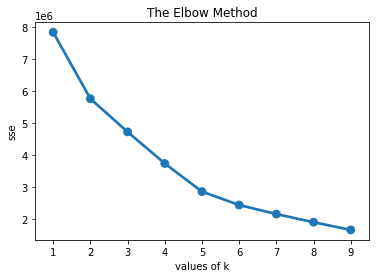

In [ ]:
encoder = OrdinalEncoder()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=42)

flower_a = flower_[['FLWP_SE_NM','PDLT_NM','SPCS_NM','GRAD_NM','AVRG_UTPC']]
flower_b = encoder.fit_transform(flower_a) 
flower_c = scaler.fit_transform(flower_b)

sse={}
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(flower_c)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('values of k')
plt.ylabel('sse')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(flower_c)
cluster_labels = kmeans.labels_
flower_clu = flower_c.copy()
cluster_labels_ = cluster_labels.copy()
cluster_labels_ = cluster_labels.T
flower_clu = pd.DataFrame(flower_clu, columns= [['FLWP_SE_NM','PDLT_NM','SPCS_NM','GRAD_NM','AVRG_UTPC']])
flower_clu['Cluster'] = cluster_labels_
plt.scatter(x=flower_clu['AVRG_UTPC'], y=flower_clu['PDLT_NM'], c=flower_clu['Cluster']);

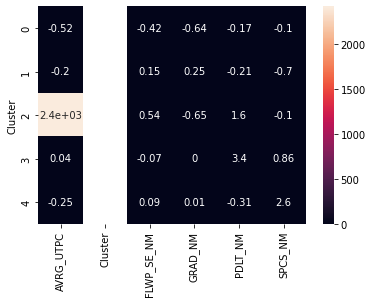

In [ ]:
flower_club = flower_b.copy()
flower_club['Cluster'] = cluster_labels_
cluster_avg = flower_club.groupby('Cluster').mean()
flower_avg = flower_club.mean()
relavtive = (cluster_avg/flower_avg -1).round(2)
sns.heatmap(data=relavtive, annot=True)

## EDA



***Columns Information of 'flower' datases***  

CPR_CODE : 법인코드  
CLCLN_YMD : 정산일자  
FLWP_SE_NM : 화훼구분명  
PDLT_NM : 품목명  
SPCS_NM : 품종명  
GRAD_NM : 등급명  
TOP_UTPC : 최고단가  
LWET_UTPC : 최저단가  
AVRG_UTPC : 평균단가  
TOT_QYT : 총수량  
TOT_AMNT : 총금액  
REG_YMD : 등록일자  
MDFCN_YMD : 수정일자

In [ ]:
flower.head()

,Unnamed: 0,CLCLN_YMD,FLWP_SE_NM,PDLT_NM,SPCS_NM,GRAD_NM,TOP_UTPC,LWET_UTPC,AVRG_UTPC,TOT_QYT,TOT_AMNT,SPCS_GRAD_x,date,temperature,rainfall,SPCS_GRAD_y
0,0,20180102,관엽,부기수,부기수9가지,특1,29000.0,29000.0,29000.0,15.0,435000.0,5,20180102,-1.8,NaN,4.607
1,1,20180102,관엽,스파트필름,향기스파트5,특1,4589.0,4200.0,4395.0,60.0,263670.0,2,20180102,-1.8,NaN,2.062
2,2,20180102,관엽,아나나스,앨리스5,특1,5200.0,5200.0,5200.0,24.0,124800.0,3,20180102,-1.8,NaN,3.000
3,3,20180102,관엽,팔손이,팔손이5,특1,6001.0,6000.0,6001.0,60.0,360030.0,3,20180102,-1.8,NaN,2.108
4,4,20180102,관엽,달개비,카멜레온10P,특1,5001.0,4700.0,4880.0,100.0,483515.0,3,20180102,-1.8,NaN,3.000


In [ ]:
flower['FLWP_SE_NM'].unique()

array(['관엽', '절화', '난', '춘란'], dtype=object)

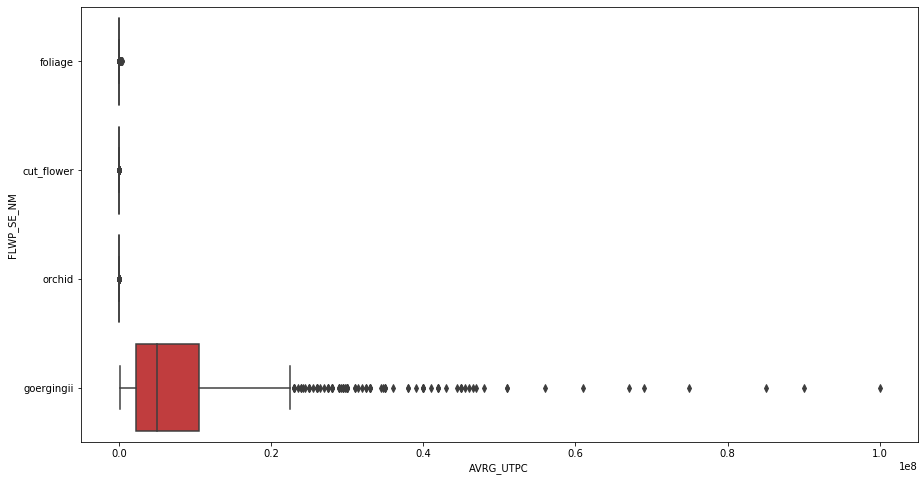

In [ ]:
a = flower.copy()
a.replace({'관엽':'foliage','난':'orchid','절화':'cut_flower','춘란':'goergingii'}, inplace=True)

plt.figure(figsize=(15,8))
sns.boxplot(x='AVRG_UTPC', y='FLWP_SE_NM', data=a);

In [ ]:
a2018 = flower.query('CLCLN_YMD < 20190101')
a2019 = flower.query('CLCLN_YMD > 20181231 and CLCLN_YMD < 20200101')
a2020 = flower.query('CLCLN_YMD > 20191231 and CLCLN_YMD < 20210101')
a2021 = flower.query('CLCLN_YMD > 20201231 and CLCLN_YMD < 20220101')
a2022 = flower.query('CLCLN_YMD > 20211231')

a2018 = a2018.groupby('CLCLN_YMD')['AVRG_UTPC'].mean()
a2019 = a2019.groupby('CLCLN_YMD')['AVRG_UTPC'].mean()
a2020 = a2020.groupby('CLCLN_YMD')['AVRG_UTPC'].mean()
a2021 = a2021.groupby('CLCLN_YMD')['AVRG_UTPC'].mean()
a2022 = a2022.groupby('CLCLN_YMD')['AVRG_UTPC'].mean()
a2018 = a2018.reset_index()
a2019 = a2019.reset_index()
a2020 = a2020.reset_index()
a2021 = a2021.reset_index()
a2022 = a2022.reset_index()
a2018 = a2018.reset_index()
a2019 = a2019.reset_index()
a2020 = a2020.reset_index()
a2021 = a2021.reset_index()
a2022 = a2022.reset_index()

a_all = pd.merge(a2018, a2019, on='index')
a_all = pd.merge(a_all, a2020, on='index')
a_all = pd.merge(a_all, a2021, on='index')
a_all = pd.merge(a_all, a2022, on='index')

del_columns = ['CLCLN_YMD_x','CLCLN_YMD_y', 'CLCLN_YMD']
a_all.drop(del_columns, axis=1, inplace=True)
a_all['total_mean'] = None
a_all['total_mean'] = a_all.mean()
a_all.head()

<ipython-input-40-2eacd5437dcf>:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'AVRG_UTPC_x', 'CLCLN_YMD_x'} in the result is deprecated and will raise a MergeError in a future version.
  a_all = pd.merge(a_all, a2021, on='index')


ValueError: ignored

In [ ]:
a201901 = a2019.query('CLCLN_YMD >= 20190101 and CLCLN_YMD < 20190201')
a201902 = a2019.query('CLCLN_YMD >= 20190201 and CLCLN_YMD < 20190301')
a201903 = a2019.query('CLCLN_YMD >= 20190301 and CLCLN_YMD < 20190401')
a201904 = a2019.query('CLCLN_YMD >= 20190401 and CLCLN_YMD < 20190501')
a201905 = a2019.query('CLCLN_YMD >= 20190501 and CLCLN_YMD < 20190601')
a201906 = a2019.query('CLCLN_YMD >= 20190601 and CLCLN_YMD < 20190701')
a201907 = a2019.query('CLCLN_YMD >= 20190701 and CLCLN_YMD < 20190801')
a201908 = a2019.query('CLCLN_YMD >= 20190801 and CLCLN_YMD < 20190901')
a201909 = a2019.query('CLCLN_YMD >= 20190901 and CLCLN_YMD < 20191001')
a201910 = a2019.query('CLCLN_YMD >= 20191001 and CLCLN_YMD < 20191101')
a201911 = a2019.query('CLCLN_YMD >= 20191101 and CLCLN_YMD < 20191201')
a201912 = a2019.query('CLCLN_YMD >= 20191201 and CLCLN_YMD < 20200101')

a202001 = a2020.query('CLCLN_YMD >= 20200101 and CLCLN_YMD < 20200201')
a202002 = a2020.query('CLCLN_YMD >= 20200201 and CLCLN_YMD < 20200301')
a202003 = a2020.query('CLCLN_YMD >= 20200301 and CLCLN_YMD < 20200401')
a202004 = a2020.query('CLCLN_YMD >= 20200401 and CLCLN_YMD < 20200501')
a202005 = a2020.query('CLCLN_YMD >= 20200501 and CLCLN_YMD < 20200601')
a202006 = a2020.query('CLCLN_YMD >= 20200601 and CLCLN_YMD < 20200701')
a202007 = a2020.query('CLCLN_YMD >= 20200701 and CLCLN_YMD < 20200801')
a202008 = a2020.query('CLCLN_YMD >= 20200801 and CLCLN_YMD < 20200901')
a202009 = a2020.query('CLCLN_YMD >= 20200901 and CLCLN_YMD < 20201001')
a202010 = a2020.query('CLCLN_YMD >= 20201001 and CLCLN_YMD < 20201101')
a202011 = a2020.query('CLCLN_YMD >= 20201101 and CLCLN_YMD < 20201201')
a202012 = a2020.query('CLCLN_YMD >= 20201201 and CLCLN_YMD < 20210101')

a202101 = a2021.query('CLCLN_YMD >= 20210101 and CLCLN_YMD < 20210201')
a202102 = a2021.query('CLCLN_YMD >= 20210201 and CLCLN_YMD < 20210301')
a202103 = a2021.query('CLCLN_YMD >= 20210301 and CLCLN_YMD < 20210401')
a202104 = a2021.query('CLCLN_YMD >= 20210401 and CLCLN_YMD < 20210501')
a202105 = a2021.query('CLCLN_YMD >= 20210501 and CLCLN_YMD < 20210601')
a202106 = a2021.query('CLCLN_YMD >= 20210601 and CLCLN_YMD < 20210701')
a202107 = a2021.query('CLCLN_YMD >= 20210701 and CLCLN_YMD < 20210801')
a202108 = a2021.query('CLCLN_YMD >= 20210801 and CLCLN_YMD < 20210901')
a202109 = a2021.query('CLCLN_YMD >= 20210901 and CLCLN_YMD < 20211001')
a202110 = a2021.query('CLCLN_YMD >= 20211001 and CLCLN_YMD < 20211101')
a202111 = a2021.query('CLCLN_YMD >= 20211101 and CLCLN_YMD < 20211201')
a202112 = a2021.query('CLCLN_YMD >= 20211201 and CLCLN_YMD < 20220101')

a202201 = a2022.query('CLCLN_YMD >= 20220101 and CLCLN_YMD < 20220201')
a202202 = a2022.query('CLCLN_YMD >= 20220201 and CLCLN_YMD < 20220301')
a202203 = a2022.query('CLCLN_YMD >= 20220301 and CLCLN_YMD < 20220401')
a202204 = a2022.query('CLCLN_YMD >= 20220401 and CLCLN_YMD < 20220501')
a202205 = a2022.query('CLCLN_YMD >= 20220501 and CLCLN_YMD < 20220601')
a202206 = a2022.query('CLCLN_YMD >= 20220601 and CLCLN_YMD < 20220701')
a202207 = a2022.query('CLCLN_YMD >= 20220701 and CLCLN_YMD < 20220801')
a202208 = a2022.query('CLCLN_YMD >= 20220801 and CLCLN_YMD < 20220901')
a202209 = a2022.query('CLCLN_YMD >= 20220901 and CLCLN_YMD < 20221001')
a202210 = a2022.query('CLCLN_YMD >= 20221001 and CLCLN_YMD < 20221101')
a202211 = a2022.query('CLCLN_YMD >= 20221101 and CLCLN_YMD < 20221201')
a202212 = a2022.query('CLCLN_YMD >= 20221201 and CLCLN_YMD < 20220101')

a18 = [5324.09, 4547.11, 5145.89, 4498.84, 4963.31, 4438.64, 4845.98, 5021.68, 5313.77, 5742.97, 5862.38, 6324.19]
a19 = [a201901.mean()[1],a201902.mean()[1],a201903.mean()[1],a201904.mean()[1],a201905.mean()[1],a201906.mean()[1]
       ,a201907.mean()[1],a201908.mean()[1],a201909.mean()[1],a201910.mean()[1],a201911.mean()[1],a201912.mean()[1]]
a20 = [a202001.mean()[1],a202002.mean()[1],a202003.mean()[1],a202004.mean()[1],a202005.mean()[1],a202006.mean()[1]
       ,a202007.mean()[1],a202008.mean()[1],a202009.mean()[1],a202010.mean()[1],a202011.mean()[1],a202012.mean()[1]]
a21 = [a202101.mean()[1],a202102.mean()[1],a202103.mean()[1],a202104.mean()[1],a202105.mean()[1],a202106.mean()[1]
       ,a202107.mean()[1],a202108.mean()[1],a202109.mean()[1],a202110.mean()[1],a202111.mean()[1],a202112.mean()[1]]
a22 = [a202201.mean()[1],a202202.mean()[1],a202203.mean()[1],a202204.mean()[1],a202205.mean()[1],a202206.mean()[1]
       ,a202207.mean()[1],a202208.mean()[1],a202209.mean()[1],a202210.mean()[1],a202211.mean()[1],a202212.mean()[1]]

a18 = np.array(a18)
a19 = np.array(a19)
a20 = np.array(a20)
a21 = np.array(a21)
a22 = np.array(a22)

a18 = pd.DataFrame(a18)
a19 = pd.DataFrame(a19)
a20 = pd.DataFrame(a20)
a21 = pd.DataFrame(a21)
a22 = pd.DataFrame(a22)

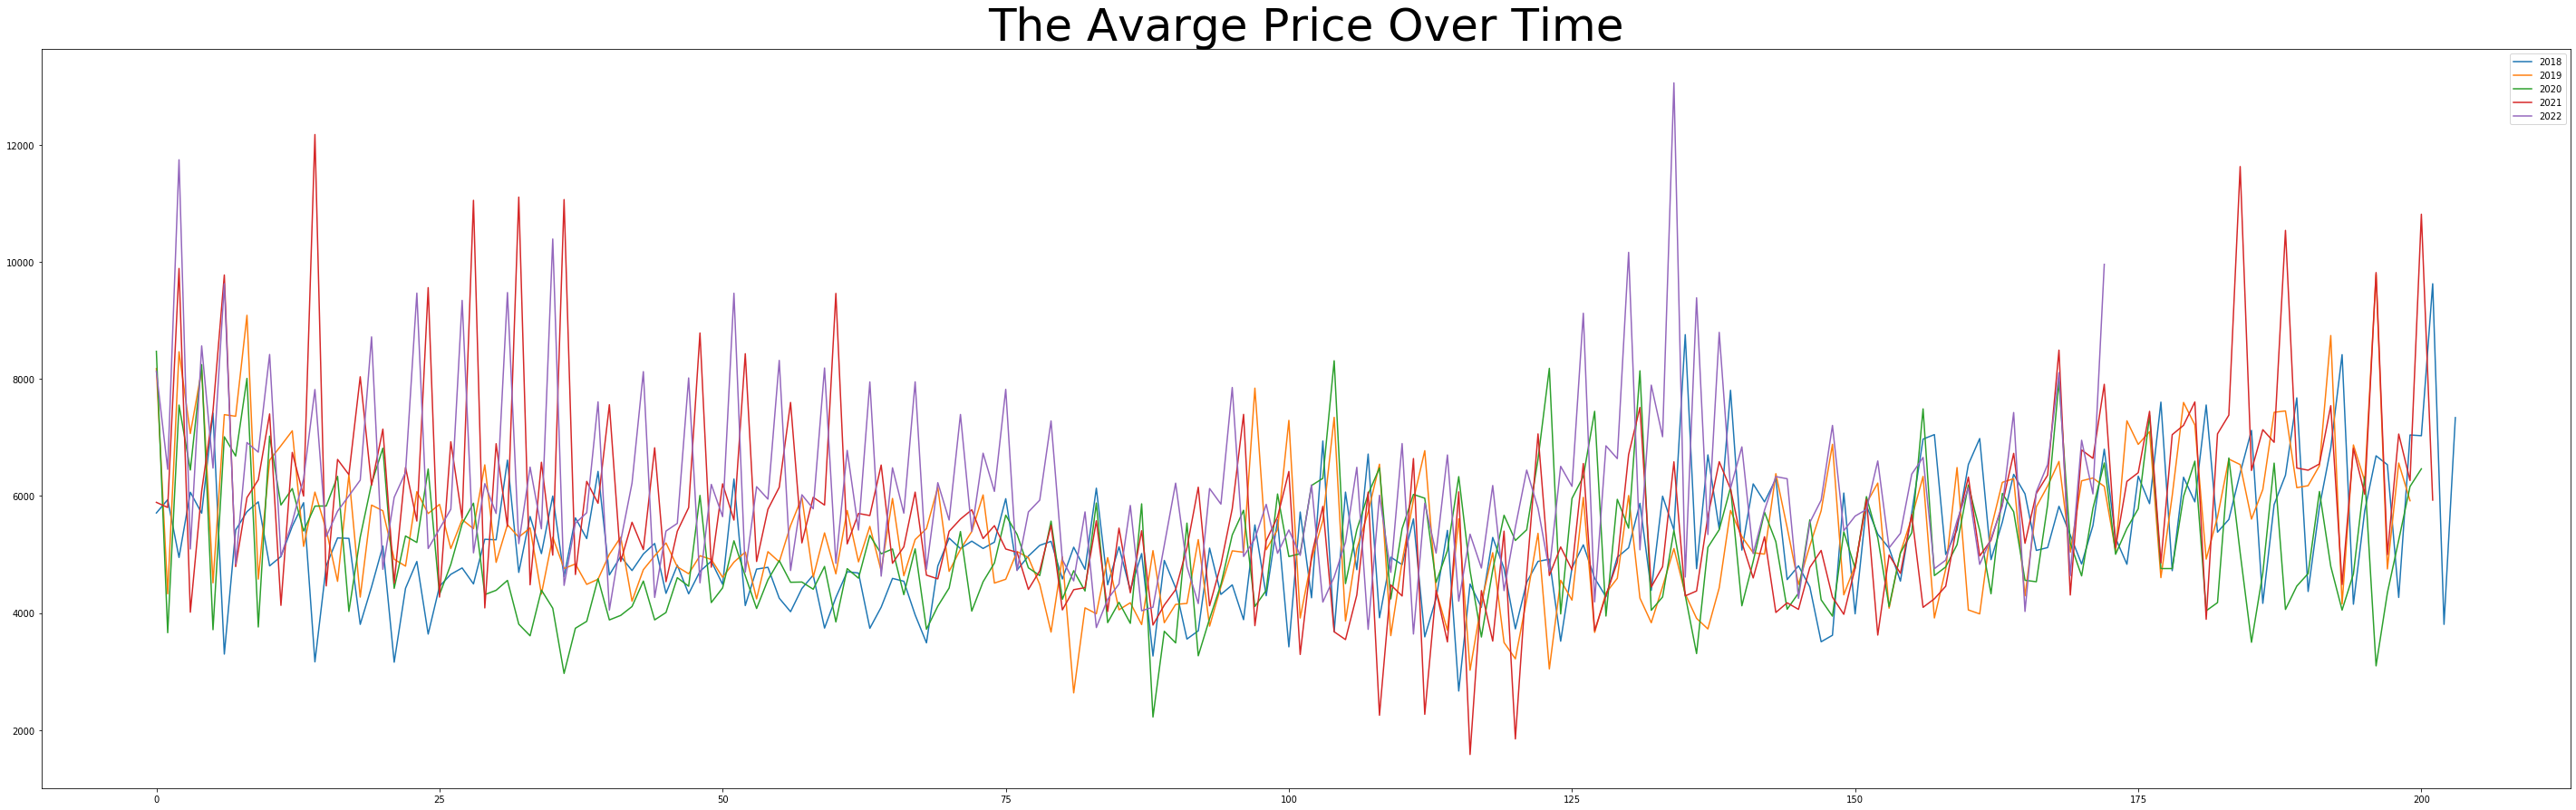

In [ ]:
plt.figure(figsize=(50,15))
plt.plot(a2018.index, a2018['AVRG_UTPC'], label='2018')
plt.plot(a2019.index, a2019['AVRG_UTPC'], label='2019')
plt.plot(a2020.index, a2020['AVRG_UTPC'], label='2020')
plt.plot(a2021.index, a2021['AVRG_UTPC'], label='2021')
plt.plot(a2022.index, a2022['AVRG_UTPC'], label='2022')
plt.legend()
plt.title('The Avarge Price Over Time', fontsize=50);

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


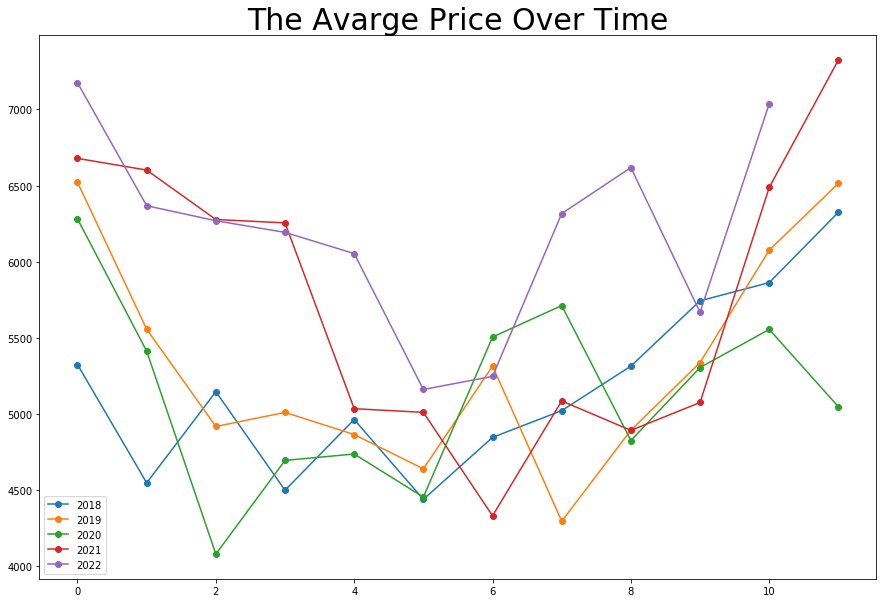

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(a18.index, a18[0], label='2018', marker='o')
plt.plot(a19.index, a19[0], label='2019', marker='o')
plt.plot(a20.index, a20[0], label='2020', marker='o')
plt.plot(a21.index, a21[0], label='2021', marker='o')
plt.plot(a22.index, a22[0], label='2022', marker='o')
plt.legend()
plt.title('The Avarge Price Over Time', fontsize=30);

In [ ]:
goeringii = flower.query('FLWP_SE_NM == "춘란"')
orchid = flower.query('FLWP_SE_NM =="난"')
foliage = flower.query('FLWP_SE_NM =="관엽"')
cut_flower = flower.query('FLWP_SE_NM =="절화"')
flower = flower.drop(goeringii.index)
flower = flower.drop(cut_flower.index)
flower.shape, goeringii.shape, cut_flower.shape

((420001, 16), (1017, 16), (1145462, 16))

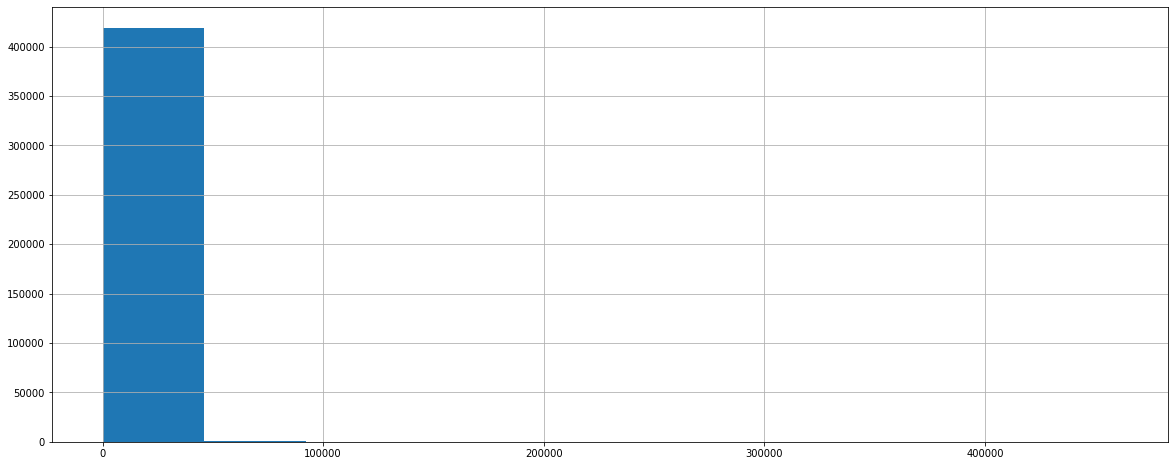

In [ ]:
plt.figure(figsize=(20,8))
flower['AVRG_UTPC'].hist()

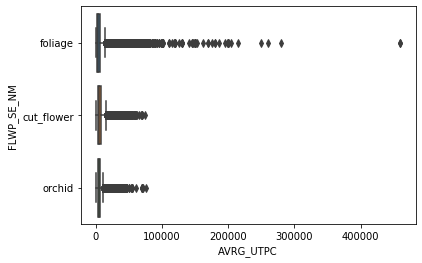

In [ ]:
b = a.drop(goeringii.index)
sns.boxplot(x='AVRG_UTPC', y='FLWP_SE_NM', data=b);

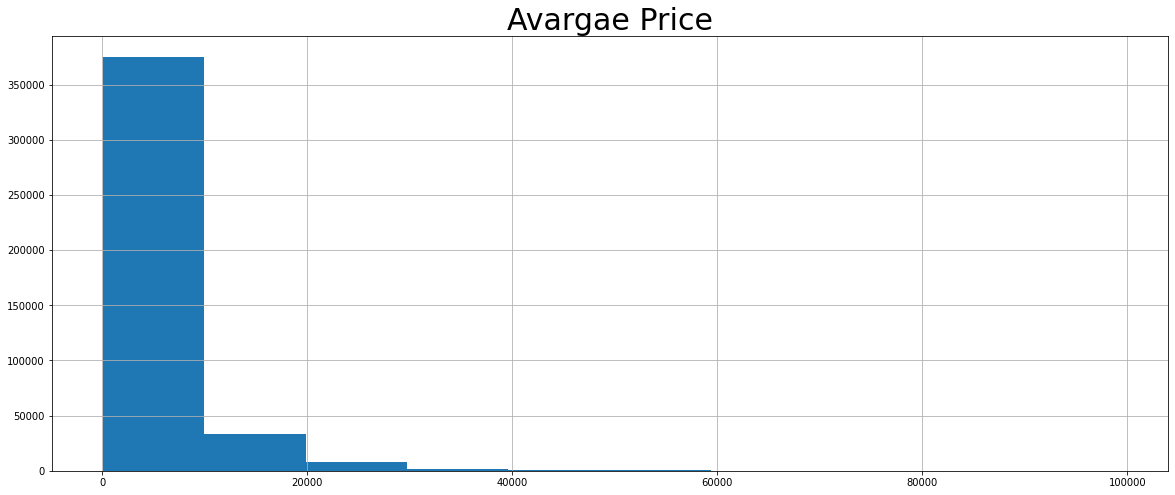

In [ ]:
c = flower.query('AVRG_UTPC < 100000')
plt.figure(figsize=(20,8))
c['AVRG_UTPC'].hist()
plt.title('Avargae Price',fontsize=30);

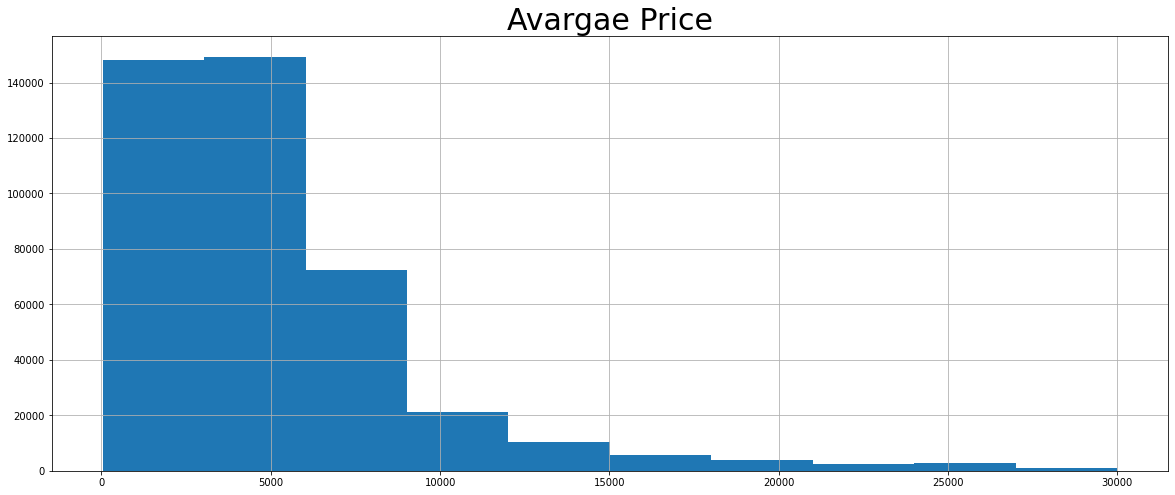

In [ ]:
d = flower.query('AVRG_UTPC < 30000')
plt.figure(figsize=(20,8))
d['AVRG_UTPC'].hist()
plt.title('Avargae Price',fontsize=30);

In [ ]:
e = flower.query('AVRG_UTPC > 30000')
e.shape[0]/b.shape[0]

0.0016640444392489633

In [ ]:
flower_data = flower.copy() #.query('AVRG_UTPC < 30000')

In [ ]:
flower_data.isnull().sum()

Unnamed: 0          0
CLCLN_YMD           0
FLWP_SE_NM          0
PDLT_NM             0
SPCS_NM             0
GRAD_NM             0
TOP_UTPC            0
LWET_UTPC           0
AVRG_UTPC           0
TOT_QYT             0
TOT_AMNT            0
SPCS_GRAD_x         0
date                0
temperature         0
rainfall       241519
SPCS_GRAD_y         0
dtype: int64

In [ ]:
flower_data['CLCLN_YMD'].quantile(0.8)

20211227.0

In [ ]:
test = flower_data.query('CLCLN_YMD >= 20211220')
train = flower_data.drop(test.index)
train['CLCLN_YMD'].quantile(0.8)

20210329.0

In [ ]:
# train, val, test 분리
def train_split(df):
  # 전체 기간을 기준으로 8:2
  test = df.query('CLCLN_YMD >= 20211227')
  train = df.drop(test.index)
  # train내 기간을 기준으로 8:2
  val = df.query('CLCLN_YMD >= 20210329')
  train = df.drop(val.index)
  return train, val, test

# train_orc, val_orc, test_orc = train_split(orchid)
# train_fol, val_fol, test_fol = train_split(foliage)
# train_cf, val_cf, test_cf = train_split(cut_flower)
train, val, test = train_split(flower_data)

In [ ]:
# feature engineer
def engineer(df):
  # 값 변환
  df.replace({'특1':9,'특2':8,'특3':7,'상1':6,'상2':5,'상3':4,'보1':3,'보2':2,'보3':1}, inplace=True)
  # 타입 변환
  df[['TOP_UTPC','LWET_UTPC','AVRG_UTPC', 'GRAD_NM','TOT_QYT']] = df[['TOP_UTPC','LWET_UTPC','AVRG_UTPC', 'GRAD_NM','TOT_QYT']].astype(int)
  # 시계열 데이터 변경
  df['CLCLN_YMD'] = df['CLCLN_YMD'].astype(str)
  df['DATE'] = pd.to_datetime(df['CLCLN_YMD'])
  df['YEAR'] = df['CLCLN_YMD'].apply(lambda x :x[:4])
  df['MONTH'] = df['CLCLN_YMD'].apply(lambda x : x[4:6])
  df['DAY'] = df['CLCLN_YMD'].apply(lambda x : x[6:])
  df['CLCLN_YMD'].apply(lambda x : datetime.strptime(x, '%Y%m%d'))
  # 결측치 처리
  df['rainfall'] = df['rainfall'].fillna(0)
  # column 이름 변환
  df.rename(columns={'SPCS_GRAD_y':'SPCS_RATE'}, inplace=True)
  # 데이터 분리
  X = df[['CLCLN_YMD','YEAR','MONTH','DAY','FLWP_SE_NM','SPCS_NM','SPCS_RATE' ,'GRAD_NM','TOT_QYT','temperature','rainfall']] # 'PDLT_NM',
  # y = df[['TOP_UTPC','LWET_UTPC','AVRG_UTPC']]
  y = df['AVRG_UTPC']
  # 타겟값 로그변환
  y = np.log1p(y)
  return X, y

# 데이터 엔지니어링
## 전체 데이터
X_train, y_train = engineer(train)
X_val, y_val = engineer(val)
X_test, y_test = engineer(test)
# ## 난
# X_train_orc, y_train_orc = engineer(train_orc)
# X_val_orc, y_val_orc = engineer(val_orc)
# X_test_orc, y_test_orc = engineer(test_orc)
# ## 관엽식물
# X_train_fol, y_train_fol = engineer(train_fol)
# X_val_fol, y_val_fol = engineer(val_fol)
# X_test_fol, y_test_fol = engineer(test_fol)
# ## 절화
# X_train_cf, y_train_cf = engineer(train_cf)
# X_val_cf, y_val_cf = engineer(val_cf)
# X_test_cf, y_test_cf = engineer(test_cf)

In [ ]:
X_train.head()

,CLCLN_YMD,YEAR,MONTH,DAY,FLWP_SE_NM,SPCS_NM,SPCS_RATE,GRAD_NM,TOT_QYT,temperature,rainfall
0,20180102,2018,01,02,관엽,부기수9가지,4.607,9,15,-1.8,0.0
1,20180102,2018,01,02,관엽,향기스파트5,2.062,9,60,-1.8,0.0
2,20180102,2018,01,02,관엽,앨리스5,3.000,9,24,-1.8,0.0
3,20180102,2018,01,02,관엽,팔손이5,2.108,9,60,-1.8,0.0
4,20180102,2018,01,02,관엽,카멜레온10P,3.000,9,100,-1.8,0.0


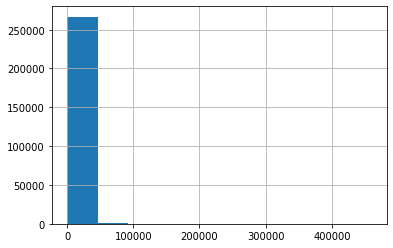

In [ ]:
train['AVRG_UTPC'].hist()

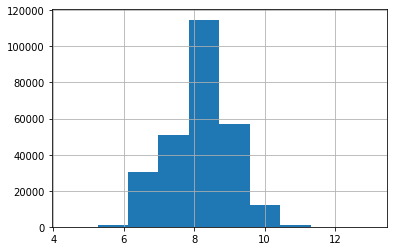

In [ ]:
y_train.hist()

## 회귀모델

In [ ]:
# 기준모델 함수
def baseline(y_val):
  major = y_val.mean()  
  y_pred_baseline = [major] * len(y_val)
  print('MAE : ',mean_absolute_error(y_val, y_pred_baseline).round(2) )
  print('MSE : ',mean_squared_error(y_val, y_pred_baseline).round(2) )
  print('RMSE : ',(mean_squared_error(y_val, y_pred_baseline)**0.5).round(2))
  print('R2 : ',r2_score(y_val, y_pred_baseline))

# 모델 학습 함수
def model_train(X_train, y_train, X_val, y_val, model):
  X_train_ = X_train.copy()
  y_train_ = y_train.copy()
  X_val_ = X_val.copy()
  y_val_ = y_val.copy()
  model.fit(X_train_, y_train_)
  y_pred = model.predict(X_val_)
  print('MAE : ',mean_absolute_error(y_val_, y_pred).round(2) )
  print('MSE : ',mean_squared_error(y_val_, y_pred).round(2) )
  print('RMSE : ',(mean_squared_error(y_val_, y_pred)**0.5).round(2))
  print('R2 : ',r2_score(y_val_,y_pred))



In [ ]:
# 랜덤포레스트 모델
pipe_ran_ord = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth = 10,
                          max_features=0.7004122286710339,
                          n_estimators=200,
                          random_state=42)
)

pipe_ran_tar = make_pipeline(
    TargetEncoder(),
    RandomForestRegressor(max_depth=7,
                          max_features=0.5106218750881119,
                          n_estimators=1417,
                          random_state=42)
)

# XGB 모델
pipe_xgb_ord = make_pipeline(
    OrdinalEncoder(),
    xgb.XGBRegressor(max_depth=8,learning_rate=0.09142,
                     n_estimators=19110, gamma=12.38,
                     min_child_weight=2.911, subsample=0.811,
                     colsample_bytree=0.3534, nthread=-1, silent=True)
)

pipe_xgb_tar = make_pipeline(
    TargetEncoder(),
    xgb.XGBRegressor(max_depth=9,learning_rate=0.1845,
                     n_estimators=6395, gamma=4.3588,
                     min_child_weight=2.2556, subsample=0.7489,
                     colsample_bytree=0.2193, nthread=-1, silent=True)
)

In [ ]:
# # randomforest 학습
# # enc = OrdinalEncoder()
# enc = TargetEncoder()
# X_train_enc = enc.fit_transform(X_train, y_train)
# X_val_enc = enc.transform(X_val)
# y_train_ = y_train.copy()
# y_val_ = y_val.copy()

# def randomforest(max_depth, n_estimators, max_features, random_state=42):
#   model = RandomForestRegressor(max_depth=int(max_depth),
#                                 n_estimators=int(n_estimators),
#                                 max_features=max_features)
#   model.fit(X_train_enc,y_train_)
#   y_pred = model.predict(X_val_enc)
#   r2 = r2_score(y_val_,y_pred)
#   return r2

# dist = {'max_depth' : (4, 9),
#         'n_estimators' : (200, 1500),
#         'max_features' : (0.4, 0.9)}

# bo = BayesianOptimization(f=randomforest, pbounds=dist, verbose=2, random_state=42)
# bo.maximize(init_points=5, n_iter=25, acu='ei',xi=0.01)
# print(bo.max)

In [ ]:
# # xgb 학습
# enc = OrdinalEncoder()
# # enc = TargetEncoder()
# X_train_enc = enc.fit_transform(X_train, y_train)
# X_val_enc = enc.transform(X_val)
# y_train_ = y_train.copy()
# y_val_ = y_val.copy()

# def XGB_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, subsample,
#            colsample_bytree, silent=True, nthread=-1):
#   model = xgb.XGBRegressor(max_depth=int(max_depth),
#                            learning_rate=learning_rate,
#                            n_estimators=int(n_estimators),
#                            gamma=gamma,
#                            min_child_weight=min_child_weight,
#                            subsample=subsample,
#                            colsample_bytree=colsample_bytree,
#                            nthread=nthread)
#   model.fit(X_train_enc, y_train_)
#   y_pred=model.predict(X_val_enc)
#   r2 = r2_score(y_val_,y_pred)
#   return r2

# pbounds = {'max_depth' : (7,10),
#            'learning_rate':(0.1,0.2),
#            'n_estimators':(5000,7000),
#            'gamma':(4,40),
#            'min_child_weight':(0,3),
#            'subsample':(0.7,0.9),
#            'colsample_bytree':(0.2,0.25)}

# bo = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)
# bo.maximize(init_points=2, n_iter=15, acq='ei',xi=0.01)
# print(bo.max)

In [ ]:
print('기준모델')
baseline(y_val)
print('\n랜덤포레스트 학습(ordinalencoder)')
model_train(X_train, y_train, X_val, y_val, pipe_ran_ord)
print('\n랜덤포레스트 학습(targetencoder)')
model_train(X_train, y_train, X_val, y_val, pipe_ran_tar)
# print('\nXGBR 학습(ordinalencoder)')
# model_train(X_train, y_train, X_val, y_val, pipe_xgb_ord)
# print('\nXGBR 학습(targetencoder)')
# model_train(X_train, y_train, X_val, y_val, pipe_xgb_tar)

기준모델
MAE :  0.63
MSE :  0.64
RMSE :  0.8
R2 :  0.0

랜덤포레스트 학습(ordinalencoder)
MAE :  0.26
MSE :  0.12
RMSE :  0.34
R2 :  0.8163531406141957

랜덤포레스트 학습(targetencoder)
MAE :  0.29
MSE :  0.14
RMSE :  0.38
R2 :  0.7766411133542624


In [ ]:
# 최종 모델 선정
model = pipe_ran_ord
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('검증 데이터 성능 확인')
print('MAE : ',mean_absolute_error(y_val, y_pred).round(2) )
print('MSE : ',mean_squared_error(y_val, y_pred).round(2) )
print('RMSE : ',(mean_squared_error(y_val, y_pred)**0.5).round(2))
print('R2 : ',r2_score(y_val,y_pred).round(3))
y_pred_ = model.predict(X_test)
print('\n테스트 데이터 성능 확인')
print('MAE : ',mean_absolute_error(y_test, y_pred_).round(2) )
print('MSE : ',mean_squared_error(y_test, y_pred_).round(2) )
print('RMSE : ',(mean_squared_error(y_test, y_pred_)**0.5).round(2))
print('R2 : ',r2_score(y_test,y_pred_).round(3))

검증 데이터 성능 확인
MAE :  0.26
MSE :  0.12
RMSE :  0.34
R2 :  0.816

테스트 데이터 성능 확인
MAE :  0.27
MSE :  0.13
RMSE :  0.36
R2 :  0.8


## 모델 해석

In [ ]:
model.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['CLCLN_YMD', 'YEAR', 'MONTH', 'DAY', 'FLWP_SE_NM',
                      'SPCS_NM'],
                mapping=[{'col': 'CLCLN_YMD', 'data_type': dtype('O'),
                          'mapping': 20180102      1
 20180103      2
 20180105      3
 20180108      4
 20180109      5
            ... 
 20210322    648
 20210323    649
 20210325    650
 20210326    651
 NaN          -2
 Length: 652, dtype: int64},
                         {'col': 'YEAR', 'data_type': dtype('O'),
                          'mapping': 2018    1
 2019    2
 2020    3
 2021    4
 NaN    -2
 dtype: int64},
                         {'col...
 08      4
 09      5
 11      6
 12      7
 15      8
 16      9
 18     10
 19     11
 22     12
 23     13
 25     14
 26     15
 29     16
 30     17
 01     18
 06     19
 13     20
 20     21
 27     22
 10     23
 17     24
 24     25
 04     26
 07     27
 14     28
 21     29
 28     30
 31     31
 NaN    -2
 dtype: int64},
          

In [ ]:
## 특성 중요도
preprocess_pipeline = model.named_steps['ordinalencoder']
model_ = model.named_steps['randomforestregressor']

X_test_preprocessed = preprocess_pipeline.transform(X_test)

permuter = PermutationImportance(
    model_,
    scoring='r2',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_preprocessed, y_test)
eli5.show_weights(permuter, top=None, feature_names=X_test.columns.tolist())
permu_list = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x:x[1],
    reverse=True
)
print(permu_list)

[('SPCS_RATE', 1.3870498600132803), ('FLWP_SE_NM', 0.009397231144231345), ('GRAD_NM', 0.0065281075605775115), ('SPCS_NM', 0.0063339115636767305), ('MONTH', 0.0033014576691352106), ('TOT_QYT', 0.002480750930604558), ('temperature', 0.001512755422627965), ('DAY', 4.839511702292576e-05), ('rainfall', 6.441963188175137e-06), ('CLCLN_YMD', 0.0), ('YEAR', -0.00010683498265040559)]


In [ ]:
permu = pd.DataFrame(permu_list, columns=['features','values'])
# n = 10
# plt.figure(figsize=(10,n/2))
# plt.title(f'TOP {n} features')
# permu_list.plot.barh(x=permu_list[1],y=permu_list[0]);
# permu_list.rename(columns={'0':'features', '1':'values'})
permu

,features,values
0,SPCS_RATE,1.387050
1,FLWP_SE_NM,0.009397
2,GRAD_NM,0.006528
3,SPCS_NM,0.006334
4,MONTH,0.003301
5,TOT_QYT,0.002481
6,temperature,0.001513
7,DAY,0.000048
8,rainfall,0.000006
9,CLCLN_YMD,0.000000


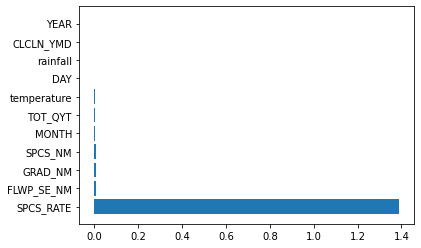

In [ ]:
plt.barh(permu['features'], permu['values']);

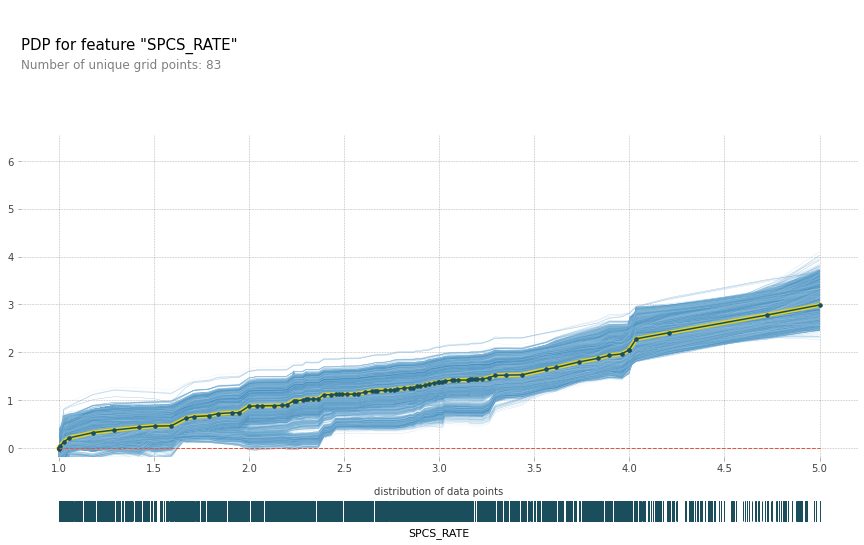

In [ ]:
# 1특성 pdp plot
feature = sorted(permu_list, key=lambda x : x[1], reverse=True)[0][0]
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
isolated = pdp_isolate(
    model = model_,
    dataset=X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature = feature,
    num_grid_points = 100
)
pdp_plot(isolated, feature_name=feature, plot_lines=True,plot_pts_dist=True);

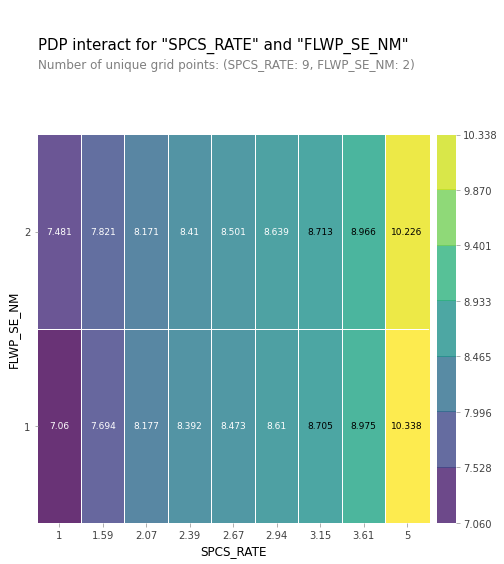

In [ ]:
# 2특성 pdp plot
features = list(map(lambda x : x[0], sorted(permu_list, key=lambda x : x[1], reverse=True)))[:2]
interaction = pdp_interact(
    model = model_,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    features = features,
)
pdp_interact_plot(interaction, plot_type='grid',
                  feature_names=features);

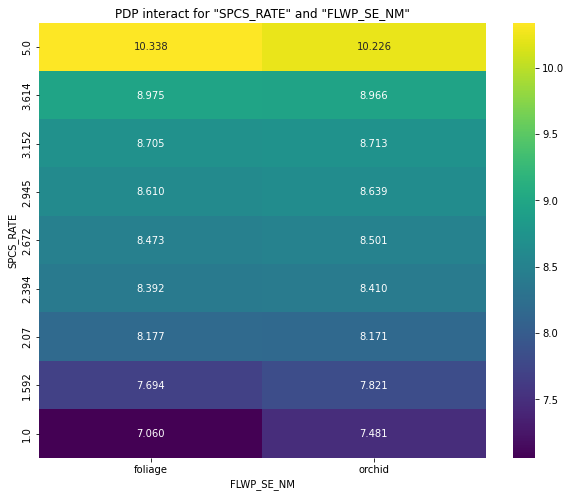

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=['FLWP_SE_NM'],
    index=['SPCS_RATE']
)[::-1]

pdp = pdp.rename(columns={1:'foliage',2:'orchid'})
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.3f',cmap='viridis')
plt.title('PDP interact for "SPCS_RATE" and "FLWP_SE_NM"');

# 이전 모델

In [ ]:
# 각 항목에 대한 기준모델 생성
# print('난에 대한 기준모델')
# baseline(y_val_orc)
# print('\n관엽식물에 대한 기준모델')
# baseline(y_val_fol)
# print('\n절화에 대한 기준모델')
# baseline(y_val_cf)

난에 대한 기준모델
MAE :  2117.8
MSE :  9239208.11
RMSE :  3039.61
R2 :  0.0

관엽식물에 대한 기준모델
MAE :  3726.32
MSE :  26805590.82
RMSE :  5177.41
R2 :  0.0

절화에 대한 기준모델
MAE :  3793.38
MSE :  24331237.45
RMSE :  4932.67
R2 :  0.0


In [ ]:
# # 학습모델 생성
# pipe_1 = make_pipeline(
#     OrdinalEncoder(),
#     RandomForestRegressor()
# )

# print('난에 대한 model 1 학습')
# model_train(X_train_orc, y_train_orc, X_val_orc, y_val_orc, pipe_1)
# print('\n관엽식물에 대한 model 1 학습')
# model_train(X_train_fol, y_train_fol, X_val_fol, y_val_fol, pipe_1)
# print('\n절화에 대한 model 1 학습')
# model_train(X_train_cf, y_train_cf, X_val_cf, y_val_cf, pipe_1)

난에 대한 model 1 학습
MAE :  1886.11
MSE :  6806386.84
RMSE :  2608.91
R2 :  0.263314911885292

관엽식물에 대한 model 1 학습
MAE :  1990.0
MSE :  12321349.69
RMSE :  3510.18
R2 :  0.54034403585263

절화에 대한 model 1 학습
MAE :  2861.14
MSE :  16241389.49
RMSE :  4030.06
R2 :  0.33248814306326746


In [ ]:
# # 관엽식물 xgb 모델
# pipe_xgb_fol = make_pipeline(
#     OrdinalEncoder(),
#     xgb.XGBRegressor(max_depth=6,learning_rate=0.23794199182423065,
#                      n_estimators=1587, gamma=69.60343315868747,
#                      min_child_weight=1.0809860916806637, subsample=0.8580892582889827,
#                      colsample_bytree=0.4081809721380245, nthread=-1, silent=True)
# )

# # 난 xgb 모델
# pipe_xgb_orc = make_pipeline(
#     OrdinalEncoder(),
#     xgb.XGBRegressor(max_depth=6,learning_rate=0.2155904802331487,
#                      n_estimators=1863, gamma=98.48557796669212,
#                      min_child_weight=2.010479427324952, subsample=0.9676072349100977,
#                      colsample_bytree=0.3983114054830898, nthread=-1, silent=True)
# )

# # 절화 xgb 모델
# pipe_xgb_cf = make_pipeline(
#     OrdinalEncoder(),
#     xgb.XGBRegressor(max_depth=5,learning_rate=0.22227824312530747,
#                      n_estimators=1561, gamma=95.07143064099162,
#                      min_child_weight=0.46805592132730955, subsample=0.5290418060840998,
#                      colsample_bytree=0.49963209507789, nthread=-1, silent=True)
# )

# print('난에 대한 model 2 학습')
# model_train(X_train_orc, y_train_orc, X_val_orc, y_val_orc, pipe_xgb_orc)
# print('\n관엽식물에 대한 model 2 학습')
# model_train(X_train_fol, y_train_fol, X_val_fol, y_val_fol, pipe_xgb_fol)
# print('\n절화에 대한 model 2 학습')
# model_train(X_train_cf, y_train_cf, X_val_cf, y_val_cf, pipe_xgb_cf)

난에 대한 model 2 학습
MAE :  1630.43
MSE :  4977621.12
RMSE :  2231.06
R2 :  0.4612502436967445

관엽식물에 대한 model 2 학습
MAE :  1575.11
MSE :  8677596.47
RMSE :  2945.78
R2 :  0.6762766198252645

절화에 대한 model 2 학습
MAE :  2605.41
MSE :  12987495.73
RMSE :  3603.82
R2 :  0.4662213233015291


In [ ]:
# # 관엽식물 xgb 모델
# pipe_xgb_fol2 = make_pipeline(
#     OrdinalEncoder(),
#     xgb.XGBRegressor(max_depth=9,learning_rate=0.23893620654005912,
#                      n_estimators=3117, gamma=93.8126526750563,
#                      min_child_weight=0.8156329742089155, subsample=0.8940706948670598,
#                      colsample_bytree=0.2653868898781192, nthread=-1, silent=True)
# )

# print('관엽식물에 대한 model 3 학습')
# model_train(X_train_fol, y_train_fol, X_val_fol, y_val_fol, pipe_xgb_fol2)

### XGB


In [ ]:
# enc = OrdinalEncoder()

# X_train_fol_enc = enc.fit_transform(X_train_fol)
# X_val_fol_enc = enc.transform(X_val_fol)

# def XGB_cv(max_depth, learning_rate, n_estimators, gamma,
#            min_child_weight, subsample,
#            colsample_bytree, silent=True, nthread=-1):
#   model = xgb.XGBRegressor(max_depth=int(max_depth),
#                            learning_rate=learning_rate,
#                            n_estimators=int(n_estimators),
#                            gamma=gamma,
#                            min_child_weight=min_child_weight,
#                            subsample=subsample,
#                            colsample_bytree=colsample_bytree,
#                            nthread=nthread)
#   model.fit(X_train_fol_enc, y_train_fol)
#   y_pred=model.predict(X_val_fol_enc)
#   r2 = r2_score(y_val_fol,y_pred)
#   return r2

# pbounds = {'max_depth' : (3,7),
#            'learning_rate':(0.01,0.3),
#            'n_estimators':(1,10000),
#            'gamma':(0,100),
#            'min_child_weight':(0,3),
#            'subsample':(0.5,1),
#            'colsample_bytree':(0.2,1)}

# bo = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)
# bo.maximize(init_points=2, n_iter=10, acq='ei',xi=0.01)
# # 'target': 0.6762766198252645, 'params': {'colsample_bytree': 0.4081809721380245, 'gamma': 69.60343315868747, 'learning_rate': 0.23794199182423065, 'max_depth': 6.447243480258468, 'min_child_weight': 1.0809860916806637, 'n_estimators': 1587.2562684700874, 'subsample': 0.8580892582889827}

In [ ]:
# print(bo.max)

{'target': 0.6762766198252645, 'params': {'colsample_bytree': 0.4081809721380245, 'gamma': 69.60343315868747, 'learning_rate': 0.23794199182423065, 'max_depth': 6.447243480258468, 'min_child_weight': 1.0809860916806637, 'n_estimators': 1587.2562684700874, 'subsample': 0.8580892582889827}}


In [ ]:
# X_train_orc_enc = enc.fit_transform(X_train_orc)
# X_val_orc_enc = enc.transform(X_val_orc)

# def XGB_cv_orc(max_depth, learning_rate, n_estimators, gamma,
#            min_child_weight, subsample,
#            colsample_bytree, silent=True, nthread=-1):
#   model = xgb.XGBRegressor(max_depth=int(max_depth),
#                            learning_rate=learning_rate,
#                            n_estimators=int(n_estimators),
#                            gamma=gamma,
#                            min_child_weight=min_child_weight,
#                            subsample=subsample,
#                            colsample_bytree=colsample_bytree,
#                            nthread=nthread)
#   model.fit(X_train_orc_enc, y_train_orc)
#   y_pred=model.predict(X_val_orc_enc)
#   r2 = r2_score(y_val_orc,y_pred)
#   return r2

# pbounds = {'max_depth' : (3,7),
#            'learning_rate':(0.01,0.3),
#            'n_estimators':(1,10000),
#            'gamma':(0,100),
#            'min_child_weight':(0,3),
#            'subsample':(0.5,1),
#            'colsample_bytree':(0.2,1)}

# bo_orc = BayesianOptimization(f=XGB_cv_orc, pbounds=pbounds, verbose=2, random_state=42)
# bo_orc.maximize(init_points=2, n_iter=10, acq='ei',xi=0.01)
# print(bo_orc.max)
# # 'target': 0.4612502436967445, 'params': {'colsample_bytree': 0.3983114054830898, 'gamma': 98.48557796669212, 'learning_rate': 0.2155904802331487, 'max_depth': 6.402534237446627, 'min_child_weight': 2.010479427324952, 'n_estimators': 1863.354173360406, 'subsample': 0.9676072349100977}

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[22:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 1         | 0.4534    | 0.4996    | 95.07     | 0.2223    | 5.395     | 0.4681    | 1.561e+03 | 0.529     |
[22:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 2         | 0.003032  | 0.8929    | 60.11     | 0.2153    | 3.082     | 2.91      | 8.325e+03 | 0.6062    |
[22:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 3         | 0.4473    | 0.2672    | 94.55     | 0.1329    | 4.261     | 0.5013    | 1.559e+03 | 0.807     |
[22:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: r

In [ ]:
# X_train_cf_enc = enc.fit_transform(X_train_cf)
# X_val_cf_enc = enc.transform(X_val_cf)

# def XGB_cv_cf(max_depth, learning_rate, n_estimators, gamma,
#            min_child_weight, subsample,
#            colsample_bytree, silent=True, nthread=-1):
#   model = xgb.XGBRegressor(max_depth=int(max_depth),
#                            learning_rate=learning_rate,
#                            n_estimators=int(n_estimators),
#                            gamma=gamma,
#                            min_child_weight=min_child_weight,
#                            subsample=subsample,
#                            colsample_bytree=colsample_bytree,
#                            nthread=nthread)
#   model.fit(X_train_cf_enc, y_train_cf)
#   y_pred=model.predict(X_val_cf_enc)
#   r2 = r2_score(y_val_cf,y_pred)
#   return r2

# pbounds = {'max_depth' : (3,7),
#            'learning_rate':(0.01,0.3),
#            'n_estimators':(1,10000),
#            'gamma':(0,100),
#            'min_child_weight':(0,3),
#            'subsample':(0.5,1),
#            'colsample_bytree':(0.2,1)}

# bo_cf = BayesianOptimization(f=XGB_cv_cf, pbounds=pbounds, verbose=2, random_state=42)
# bo_cf.maximize(init_points=2, n_iter=10, acq='ei',xi=0.01)
# print(bo_cf.max)
# # {'target': 0.4661911059528796, 'params': {'colsample_bytree': 0.49963209507789, 'gamma': 95.07143064099162, 'learning_rate': 0.22227824312530747, 'max_depth': 5.394633936788146, 'min_child_weight': 0.46805592132730955, 'n_estimators': 1560.7892088416902, 'subsample': 0.5290418060840998}}

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[23:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 1         | 0.4662    | 0.4996    | 95.07     | 0.2223    | 5.395     | 0.4681    | 1.561e+03 | 0.529     |
[23:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 2         | -2.699    | 0.8929    | 60.11     | 0.2153    | 3.082     | 2.91      | 8.325e+03 | 0.6062    |
[00:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 3         | 0.4613    | 0.2672    | 94.55     | 0.1329    | 4.261     | 0.5013    | 1.559e+03 | 0.807     |
[00:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: r

In [ ]:
# enc = OrdinalEncoder()
# # X_train_enc = enc.fit_transform(X_train_orc)
# # X_val_enc = enc.transform(X_val_orc)
# # y_train_ = y_train_orc.copy()
# # y_val_ = y_val_orc.copy()

# def XGB_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, subsample,
#            colsample_bytree, silent=True, nthread=-1):
#   model = xgb.XGBRegressor(max_depth=int(max_depth),
#                            learning_rate=learning_rate,
#                            n_estimators=int(n_estimators),
#                            gamma=gamma,
#                            min_child_weight=min_child_weight,
#                            subsample=subsample,
#                            colsample_bytree=colsample_bytree,
#                            nthread=nthread)
#   model.fit(X_train_enc, y_train_)
#   y_pred=model.predict(X_val_enc)
#   r2 = r2_score(y_val_,y_pred)
#   return r2

# pbounds = {'max_depth' : (3,10),
#            'learning_rate':(0.01,0.3),
#            'n_estimators':(1,20000),
#            'gamma':(0,100),
#            'min_child_weight':(0,3),
#            'subsample':(0.5,1),
#            'colsample_bytree':(0.2,1)}

# # bo_orc = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)
# # bo_orc.maximize(init_points=5, n_iter=25, acq='ei',xi=0.01)
# # print(bo_orc.max)
# # # 'target': 0.46041354461495754, 'params': {'colsample_bytree': 0.48166070659907745, 'gamma': 17.49061749387961, 'learning_rate': 0.06471954074041808, 'max_depth': 5.255244858969034, 'min_child_weight': 0.9306674321059498, 'n_estimators': 5793.464752571786, 'subsample': 0.8799404581663277}

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[23:55:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument



| 1         | 0.4501    | 0.4996    | 95.07     | 0.2223    | 7.191     | 0.4681    | 3.121e+03 | 0.529     |
[23:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 2         | -0.4016   | 0.8929    | 60.11     | 0.2153    | 3.144     | 2.91      | 1.665e+04 | 0.6062    |
[00:05:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 3         | 0.4565    | 0.3455    | 18.34     | 0.09823   | 6.673     | 1.296     | 5.825e+03 | 0.8059    |
[00:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 4         | 0.4581    | 0.3116    | 29.21     | 0.1162    | 6.192     | 2.356     | 3.994e+03 | 0.7571    |
[00:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 5         | -1.58     | 0.6739    | 4.645     | 0.

In [ ]:
# X_train_enc = enc.fit_transform(X_train_fol)
# X_val_enc = enc.transform(X_val_fol)
# y_train_ = y_train_fol.copy()
# y_val_ = y_val_fol.copy()

# bo_fol = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)
# bo_fol.maximize(init_points=5, n_iter=25, acq='ei',xi=0.01)
# print(bo_fol.max)
# # 'target': 0.700708058398126, 'params': {'colsample_bytree': 0.2653868898781192, 'gamma': 93.8126526750563, 'learning_rate': 0.23893620654005912, 'max_depth': 9.014404169060615, 'min_child_weight': 0.8156329742089155, 'n_estimators': 3117.043470170024, 'subsample': 0.8940706948670598}

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[02:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  import sys


| 1         | 0.6988    | 0.4996    | 95.07     | 0.2223    | 7.191     | 0.4681    | 3.121e+03 | 0.529     |
[02:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 2         | -1.626    | 0.8929    | 60.11     | 0.2153    | 3.144     | 2.91      | 1.665e+04 | 0.6062    |
[02:10:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 3         | 0.6873    | 0.3455    | 18.34     | 0.09823   | 6.673     | 1.296     | 5.825e+03 | 0.8059    |
[02:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 4         | 0.6794    | 0.3116    | 29.21     | 0.1162    | 6.192     | 2.356     | 3.994e+03 | 0.7571    |
[02:15:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
| 5         | -0.8778   | 0.6739    | 4.645     | 0.

In [ ]:
# X_train_enc = enc.fit_transform(X_train_cf)
# X_val_enc = enc.transform(X_val_cf)
# y_train_ = y_train_cf.copy()
# y_val_ = y_val_cf.copy()

# bo_cf = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)
# bo_cf.maximize(init_points=5, n_iter=25, acq='ei',xi=0.01)
# print(bo_cf.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[07:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  import sys


KeyboardInterrupt: ignored